**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.linear_model import LogisticRegression,SGDClassifier,LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc,confusion_matrix,classification_report
import seaborn as sns

%matplotlib inline

**Exploratory Data Analysis**

In [4]:
drug_df=pd.read_excel("Healthcare_dataset.xlsx")

In [5]:
drug_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [6]:
drug_df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [7]:
drug_df=drug_df.drop_duplicates()

In [8]:
drug_df=drug_df.dropna()

In [9]:
#Chanbing column names to lowercase
drug_df.columns=[x.lower().strip() for x in drug_df.columns]
drug_df.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

In [10]:
#numeric columns present in dataset
nums_col=drug_df._get_numeric_data().columns
nums_col

Index(['dexa_freq_during_rx', 'count_of_risks'], dtype='object')

In [11]:
drug_df.size

236256

In [12]:
drug_df.shape

(3424, 69)

In [13]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [14]:
drug_df.isnull().sum()

ptid                              0
persistency_flag                  0
gender                            0
race                              0
ethnicity                         0
                                 ..
risk_hysterectomy_oophorectomy    0
risk_estrogen_deficiency          0
risk_immobilization               0
risk_recurring_falls              0
count_of_risks                    0
Length: 69, dtype: int64

**Combining disease and treatment factor columns into frequency counts**

In [15]:
grouping_dict= {}
grouping=["concom","comorb","risk"]
for val in grouping:
    for col in drug_df.columns:
        if col.startswith(val):
            grouping_dict[col]=val

In [16]:
grouping_dict

{'concom_cholesterol_and_triglyceride_regulating_preparations': 'concom',
 'concom_narcotics': 'concom',
 'concom_systemic_corticosteroids_plain': 'concom',
 'concom_anti_depressants_and_mood_stabilisers': 'concom',
 'concom_fluoroquinolones': 'concom',
 'concom_cephalosporins': 'concom',
 'concom_macrolides_and_similar_types': 'concom',
 'concom_broad_spectrum_penicillins': 'concom',
 'concom_anaesthetics_general': 'concom',
 'concom_viral_vaccines': 'concom',
 'comorb_encounter_for_screening_for_malignant_neoplasms': 'comorb',
 'comorb_encounter_for_immunization': 'comorb',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx': 'comorb',
 'comorb_vitamin_d_deficiency': 'comorb',
 'comorb_other_joint_disorder_not_elsewhere_classified': 'comorb',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx': 'comorb',
 'comorb_long_term_current_drug_therapy': 'comorb',
 'comorb_dorsalgia': 'comorb',
 'comorb_personal_history_of_other_diseases_and_conditions': 'como

In [17]:
# Deleting columns which do not fall under the risk factor bucket
del grouping_dict['risk_segment_prior_ntm']
del grouping_dict['risk_segment_during_rx']
combined_columns =[x for x in grouping_dict.keys()]

<b> Converting yes and no to 1 and 0 </b>


In [18]:
le=LabelEncoder()
for val in combined_columns:
    drug_df[val]=le.fit_transform(drug_df[val])

**Grouping the values together using groupby function**

In [19]:
to_combine=drug_df.set_index('ptid').groupby(grouping_dict,axis=1).sum()
to_combine.columns=['concomitancy_count','comorbidity_count','risk_factors_count']
to_combine=to_combine.reset_index()
to_combine.head()

,ptid,concomitancy_count,comorbidity_count,risk_factors_count
0,P1,5,0,0
1,P2,1,0,0
2,P3,2,1,2
3,P4,6,3,1
4,P5,5,3,1


<b> Merging the data </b>

In [20]:
drug_df=drug_df.drop(combined_columns,axis=1)
drug_df=pd.merge(drug_df,to_combine,on='ptid',how='inner')
drug_df=drug_df.drop(['count_of_risks'],axis=1)

In [21]:
drug_df.shape

(3424, 28)

In [22]:
drug_df.describe()

,dexa_freq_during_rx,concomitancy_count,comorbidity_count,risk_factors_count
count,3424.000000,3424.000000,3424.000000,3424.000000
mean,3.016063,4.098423,2.174942,1.239486
std,8.136545,2.779239,2.094203,1.094914
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000
50%,0.000000,4.000000,2.000000,1.000000
75%,3.000000,6.000000,3.000000,2.000000
max,146.000000,13.000000,10.000000,7.000000


In [23]:
drug_df.describe(include='O')

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,3,3,4,4,2,2,2
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,VLR_LR,>-2.5,Unknown,Unknown,No change,Unknown,Adherent,Y,Y
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3007,1931,1951,1497,1497,1660,2229,3251,2557,3056


<b> Feature Engineering</b>

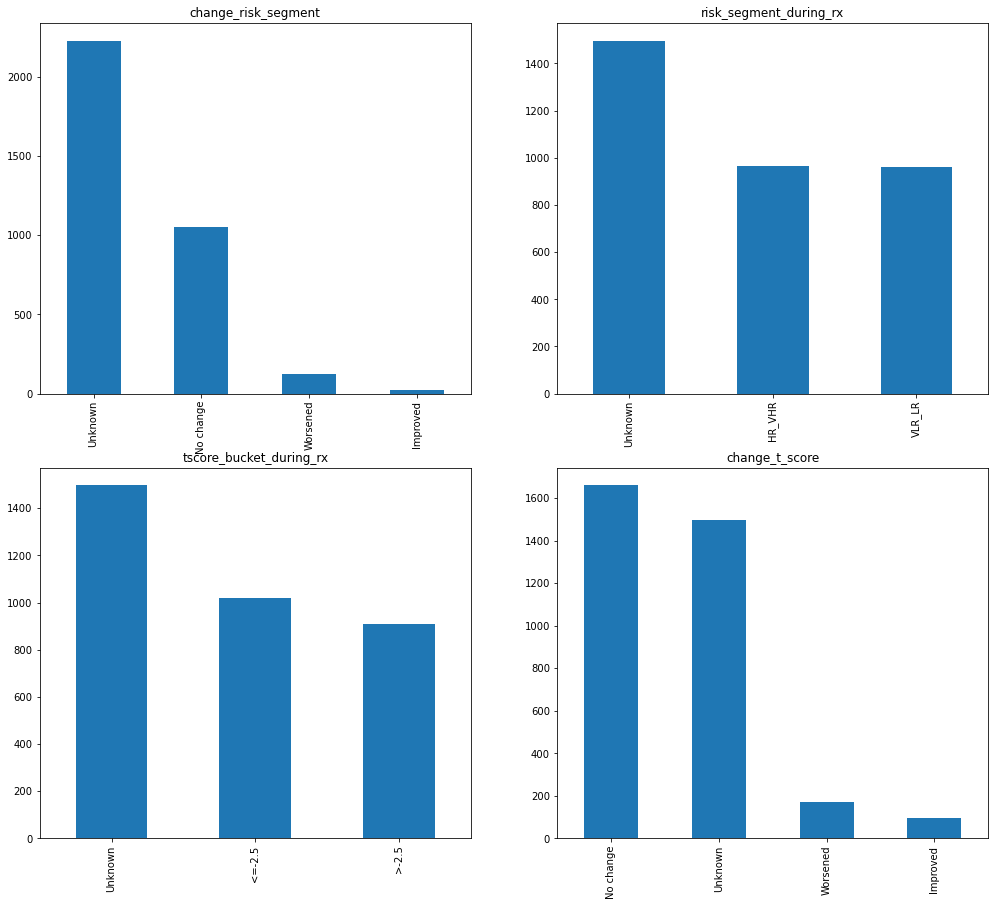

In [24]:
fig, axarr = plt.subplots(2, 2, figsize=(17, 15))
drug_df['change_risk_segment'].value_counts().plot.bar(ax=axarr[0][0]).title.set_text('change_risk_segment')
drug_df['risk_segment_during_rx'].value_counts().plot.bar(ax=axarr[0][1]).title.set_text('risk_segment_during_rx')
drug_df['tscore_bucket_during_rx'].value_counts().plot.bar(ax=axarr[1][0]).title.set_text('tscore_bucket_during_rx')
drug_df['change_t_score'].value_counts().plot.bar(ax=axarr[1][1]).title.set_text('change_t_score')


<b> From the above graph we could clearly analysis that majority is unknown values which would not benefit us.</b> 

In [25]:
drug_df=drug_df.drop(['change_risk_segment','risk_segment_during_rx','tscore_bucket_during_rx','change_t_score'],axis = 1)

In [26]:
binary_cols = ['persistency_flag','gender','ntm_specialist_flag','gluco_record_prior_ntm','gluco_record_during_rx','dexa_during_rx','frag_frac_during_rx','risk_segment_prior_ntm','tscore_bucket_prior_ntm','adherent_flag','idn_indicator','injectable_experience_during_rx','frag_frac_prior_ntm']


In [27]:
for col in binary_cols:
    drug_df[col] = le.fit_transform(drug_df[col])


In [28]:
drug_df = drug_df.drop(['race','ethnicity'],axis =1)



In [29]:
multiple_class = ['age_bucket','ntm_speciality','ntm_speciality_bucket','region']
for column in multiple_class:
    drug_df[column] = drug_df[column].astype('category')
    drug_df[column] = le.fit_transform(drug_df[column])

In [30]:
drug_df.dtypes

ptid                               object
persistency_flag                    int64
gender                              int64
region                              int64
age_bucket                          int64
ntm_speciality                      int64
ntm_specialist_flag                 int64
ntm_speciality_bucket               int64
gluco_record_prior_ntm              int64
gluco_record_during_rx              int64
dexa_freq_during_rx                 int64
dexa_during_rx                      int64
frag_frac_prior_ntm                 int64
frag_frac_during_rx                 int64
risk_segment_prior_ntm              int64
tscore_bucket_prior_ntm             int64
adherent_flag                       int64
idn_indicator                       int64
injectable_experience_during_rx     int64
concomitancy_count                  int64
comorbidity_count                   int64
risk_factors_count                  int64
dtype: object

In [31]:
drug_df.shape

(3424, 22)

<b> Feature Selection </b>
<ul>
<li> If the input variable is categorical and the output variable is also categorical then we will use the Mutual Classifier Method </li>
<li> Scikit library provides a class known as SelectKbest when we use Mutual Classifier Method.</li>


In [32]:
features = drug_df.copy()
target = features[['persistency_flag']]
features = features.drop(['ptid','persistency_flag'],axis=1)


In [33]:
fs = SelectKBest(score_func=mutual_info_classif,k= 10)
fs.fit(features , target.values.ravel())

SelectKBest(score_func=<function mutual_info_classif at 0x7f9cf6c900d0>)

In [34]:
feature_columns=features.columns
feature_list = []
for i in range(len(fs.scores_)):
    feature_list.append([feature_columns[i],fs.scores_[i]])
feature_df = pd.DataFrame(feature_list)
feature_df = feature_df.sort_values(1,ascending=False)
feature_df.columns = ['feature','score']
feature_df


,feature,score
8,dexa_freq_during_rx,0.147888
17,concomitancy_count,0.142565
9,dexa_during_rx,0.116134
18,comorbidity_count,0.073051
7,gluco_record_during_rx,0.022623
3,ntm_speciality,0.020939
4,ntm_specialist_flag,0.017648
10,frag_frac_prior_ntm,0.015822
16,injectable_experience_during_rx,0.015196
1,region,0.009656


In [35]:
selected_columns = feature_df['feature'][:10].tolist()
selected_columns

['dexa_freq_during_rx',
 'concomitancy_count',
 'dexa_during_rx',
 'comorbidity_count',
 'gluco_record_during_rx',
 'ntm_speciality',
 'ntm_specialist_flag',
 'frag_frac_prior_ntm',
 'injectable_experience_during_rx',
 'region']

In [36]:
feature_final = features[selected_columns]

In [37]:
test = drug_df[['concomitancy_count',
 'dexa_freq_during_rx',
 'dexa_during_rx',
 'comorbidity_count',
 'gluco_record_during_rx',
 'ntm_speciality_bucket',
 'ntm_speciality',
 'gluco_record_prior_ntm',
 'adherent_flag',
 'age_bucket', 'persistency_flag']].drop_duplicates()


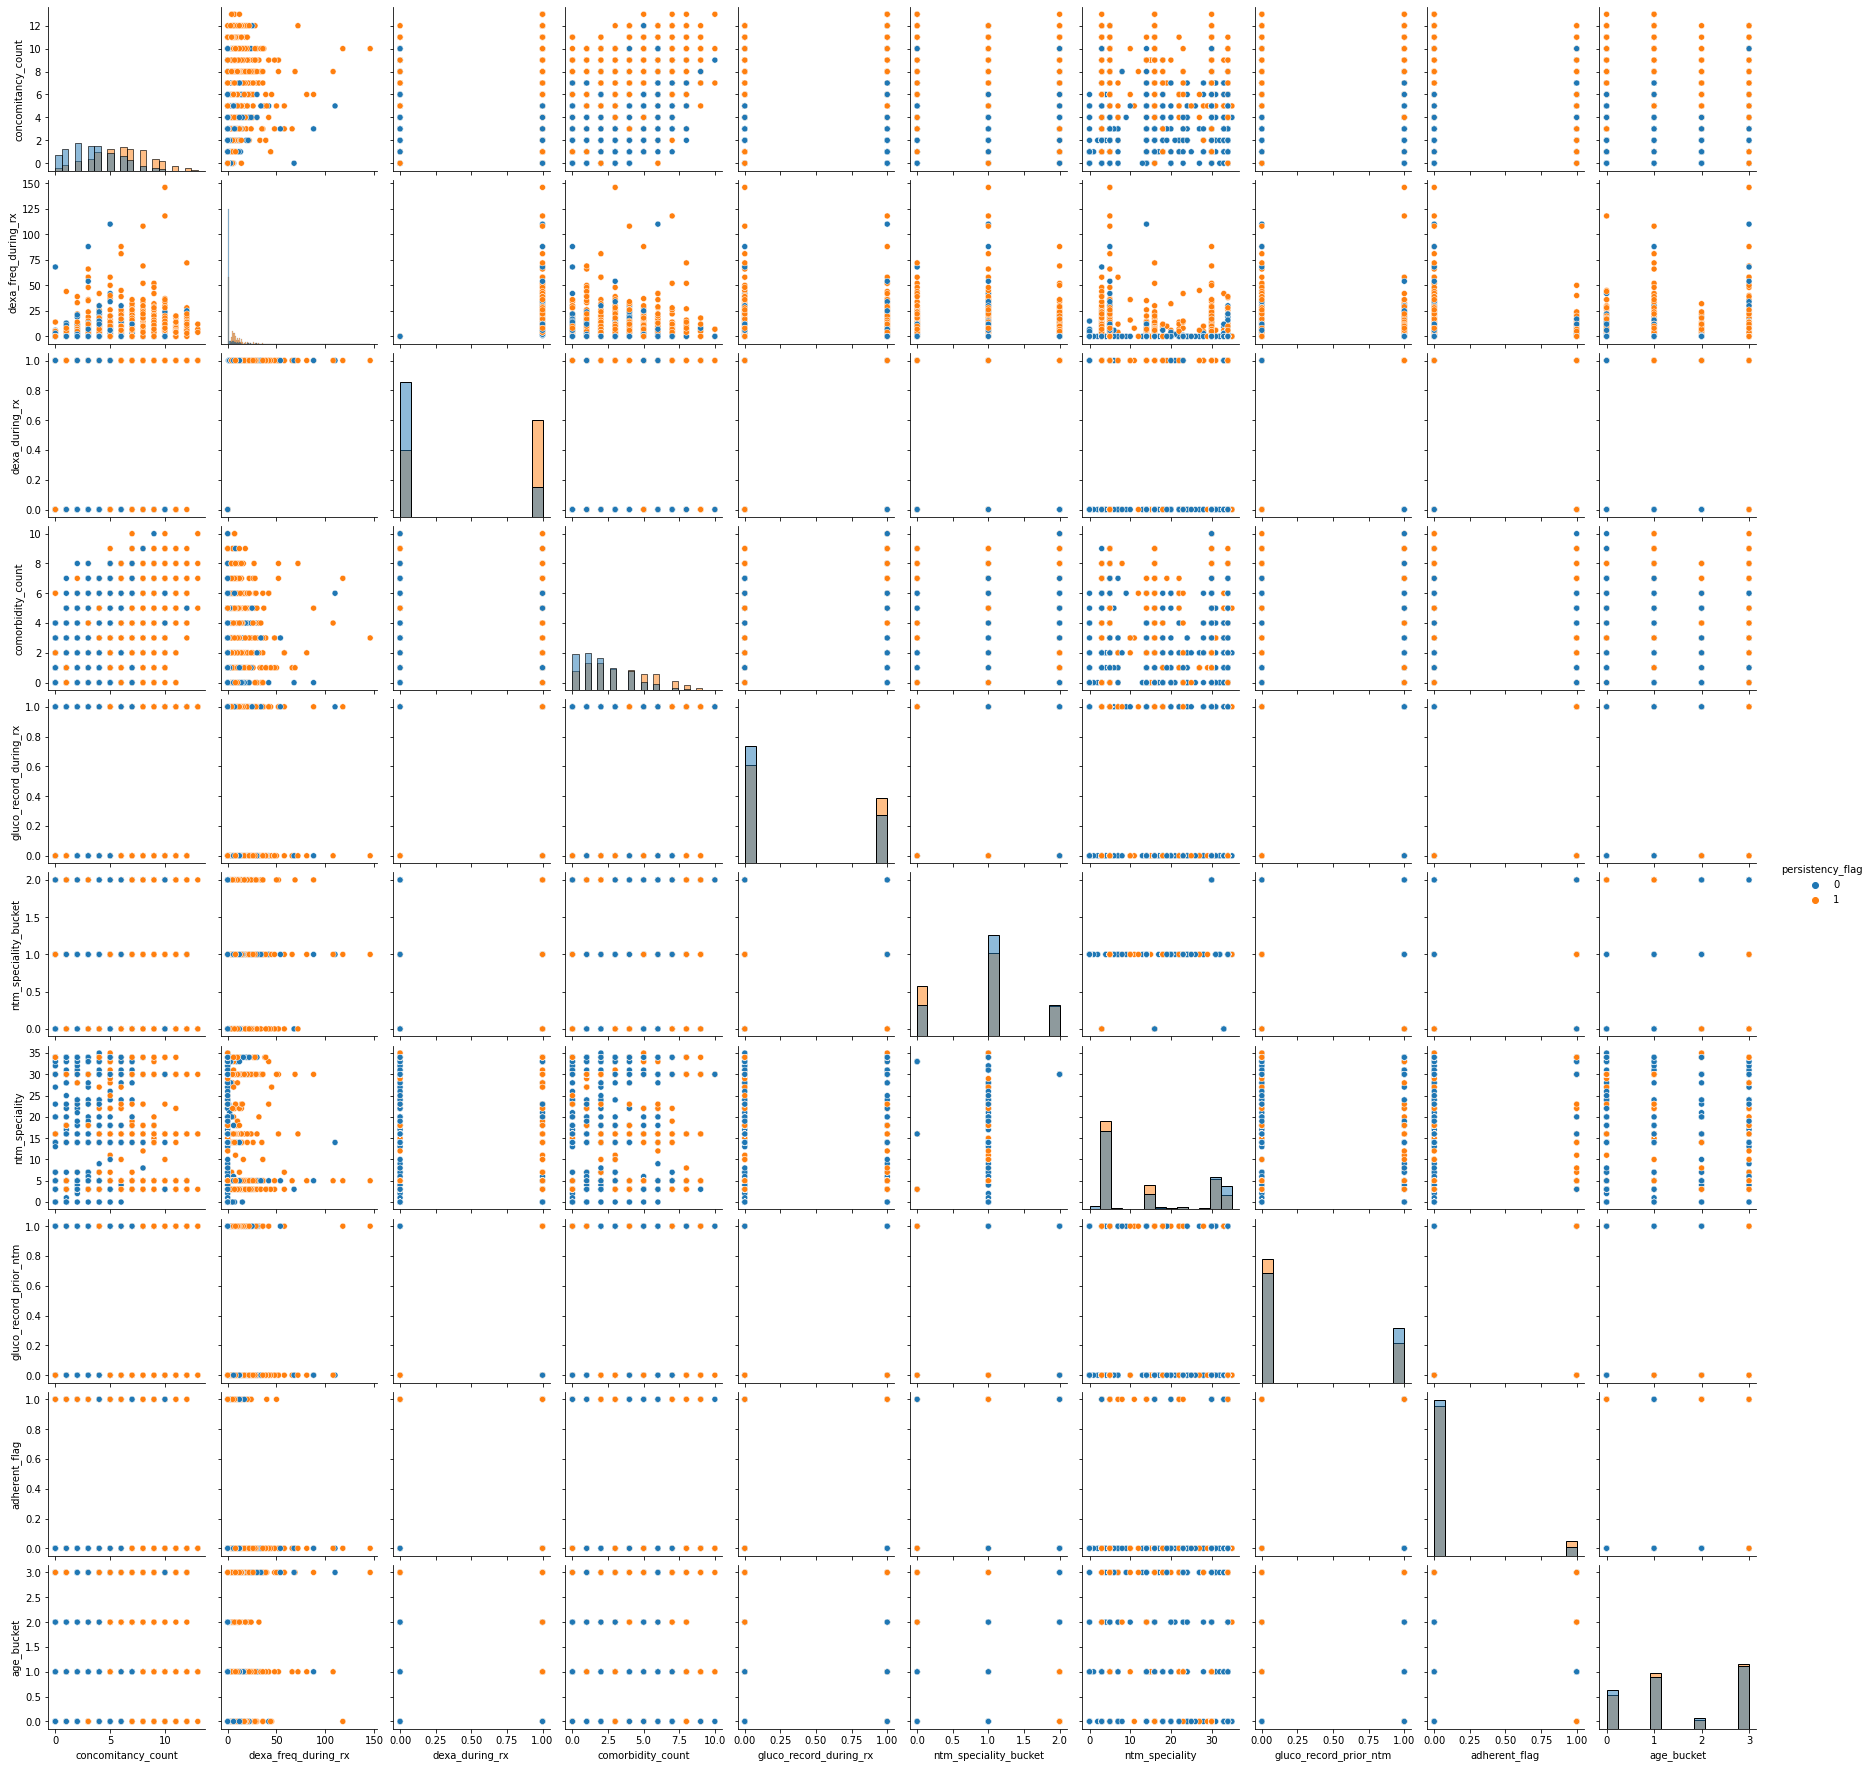

In [38]:
sns.pairplot(test, hue='persistency_flag',diag_kind='hist')

<b> Training the set </b>

In [39]:
X_train, X_test,y_train,y_test=train_test_split(feature_final,target,train_size=0.8,random_state=42)

<b> Model Selection </b>

<ul>
    <li>Regression models</li>
    <li>Classification Models</li>

In [40]:
# List of all models
models_list=[]

<b> Linear Regression</b>

In [41]:
linreg=LinearRegression()
linreg.fit(X_train,y_train.values.ravel())
scores=cross_val_score(linreg,X_train,y_train.values.ravel(),scoring='roc_auc',cv=10)
models_list.append(['Linear Regression',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.8633435044019893


<b> Logistic Regression</b>

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
scores = cross_val_score(logreg,X_train,y_train.values.ravel(), scoring='roc_auc', cv=10)
models_list.append(['Logistic Regression',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.8653484667716386


<b> K Nearest Neighbours</b>

In [43]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train.values.ravel())
scores = cross_val_score(knn,X_train,y_train.values.ravel(), scoring='roc_auc', cv=10)
models_list.append(['K Neighbours Classifiers',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.8501954862628462


<b> Support Vector Classifier</b>

In [44]:
svc=SVC()
svc.fit(X_train,y_train.values.ravel())
scores=cross_val_score(svc,X_train,y_train.values.ravel(),scoring='roc_auc',cv=10)
models_list.append(['SVC',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))


Mean ROC AUC 0.8600749083551769


<b>Decision Tree</b>

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
scores = cross_val_score(dtc,X_train,y_train.values.ravel(), scoring='roc_auc', cv=10)
models_list.append(['Decision Tree',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7085008894088669


<b> Random Forest</b>

In [46]:
random_forest = RandomForestClassifier(n_estimators= 300)
random_forest.fit(X_train, y_train.values.ravel())
scores = cross_val_score(random_forest,X_train,y_train.values.ravel(), scoring='roc_auc', cv=10)
models_list.append(['Random Forest',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.8327739858439609


In [47]:
model_df = pd.DataFrame(models_list)

In [48]:
model_df.columns = ['model','train_roc']
model_df.sort_values('train_roc',ascending = False)

,model,train_roc
1,Logistic Regression,0.865348
0,Linear Regression,0.863344
3,SVC,0.860075
2,K Neighbours Classifiers,0.850195
5,Random Forest,0.832774
4,Decision Tree,0.708501


In [50]:
logreg.fit(X_train, y_train.values.ravel())
output = logreg.predict(X_test)

<b> Confusion Matrix</b>

In [51]:
class_report = classification_report(y_test,output)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       431
           1       0.75      0.67      0.71       254

    accuracy                           0.79       685
   macro avg       0.78      0.77      0.77       685
weighted avg       0.79      0.79      0.79       685



In [52]:
f1_value = f1_score(y_test,output) 
print('F1 score:',f1_value)


F1 score: 0.7068607068607068


In [57]:
log_y_pred_proba = logreg.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Area under Curve:',roc_auc)

Area under Curve: 0.8512843232182983


<b> Plotting the curve</b>

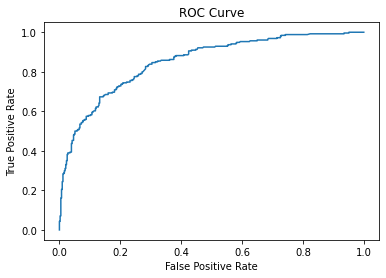

In [58]:
plt.plot(false_positive_rate, true_positive_rate)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



<b> Conclusion</b>
<ul> By evaluating all the models, the best fit is <b> Logistic Regression</b> with an AOU curve 0.85 and F1 Score 0.70</ul>